# Dataset

This project is based on the [Large-scale CelebFaces Attributes](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset, which contains around 200k celebrity face images with 40 annotated attributes for each image. The dataset is divided into a training set of 162770 images, a validation set of 19867 images, and a test set of 19962 images. The images are in JPEG format and have a resolution of 178x218 pixels.

![CelebA](pics/CelebA.png)

## Loading the data

The [CelebA Dataset](https://pytorch.org/vision/main/generated/torchvision.datasets.CelebA.html) is available in PyTorch through the TorchVision library. You can download the images by setting `download=True` when creating the dataset. This requires the [`gdown`](https://github.com/wkentaro/gdown) package to be installed.

In [1]:
from torchvision.datasets import CelebA

dataset = CelebA(".data", split="train", download=True)
dataset

Dataset CelebA
    Number of datapoints: 162770
    Root location: .data
    Target type: ['attr']
    Split: train

:::{note}
If you get the error "Too many users have viewed or downloaded this file recently", you can manually download the images from [this link](https://github.com/jhalmes/celeba), the annotations from [this link](https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg&usp=sharing), and then recreate the following structure in `.data/celeba` folder.

```
celeba
├── img_align_celeba
│   ├── 000001.jpg
│   ├── 000002.jpg
│   └── ...
├── identity_CelebA.txt
├── list_attr_celeba.txt
├── list_bbox_celeba.txt
├── list_eval_partition.txt
└── list_landmarks_align_celeba.txt
```
:::


Each sample in the dataset is a tuple containing the image and the attributes. The attributes are encoded as a 40-dimensional multi-hot vector, where each element is either 0 or 1 indicating the absence or presence of the corresponding attribute.

In [10]:
image, attributes = dataset[0]

print(image, '\n')
print(attributes)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x144DE1E80> 

tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])


The dataset contains a list of attribute names, which can be used to interpret the attribute vectors. Let's plot a few samples from the dataset to see what the images look like.

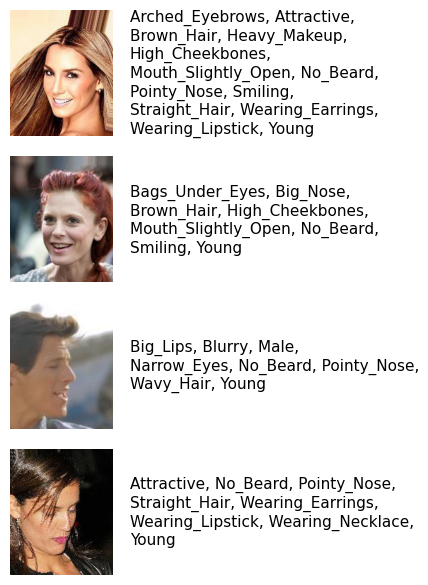

In [2]:
import matplotlib.pyplot as plt
import textwrap

n = 4
fig, axes = plt.subplots(n, 2, figsize=(5, 6), tight_layout=True)

for i in range(n):
    img, label = dataset[i]
    attr = [dataset.attr_names[j] for j in range(len(label)) if label[j] == 1]
    attr_str = ', '.join(attr)
    wrapped_text = "\n".join(textwrap.wrap(attr_str, width=35))
    axes[i, 1].text(0, 0.5, wrapped_text, fontsize=11, va="center")
    axes[i, 1].axis("off")
    axes[i, 0].imshow(img)
    axes[i, 0].axis("off")

## Attribute names

The full list of attributes in the CelebA dataset is displayed below. The attributes are grouped into categories, which have no importance in the dataset.

| Category | Attributes |
| --- | --- |
| **Hair** | Bald, Bangs, Black Hair, Blond Hair, Brown Hair, Gray Hair, Receding Hairline, Straight Hair, Wavy Hair |
| **Eyes** | Arched Eyebrows, Bags Under Eyes, Bushy Eyebrows, Narrow Eyes |
| **Beard** | 5 O'Clock Shadow, Goatee, Mustache, No Beard, Sideburns |
| **Mouth** | Big Lips, Mouth Slightly Open, Smiling, Wearing Lipstick |
| **Face** | Big Nose, Chubby, Double Chin, High Cheekbones, Oval Face, Pointy Nose |
| **Skin** | Pale Skin, Rosy Cheeks, Heavy Makeup |
| **Accessories** | Eyeglasses, Wearing Earrings, Wearing Hat, Wearing Necklace, Wearing Necktie |
| **Misc** | Attractive, Blurry, Male, Young 